# Regresión lineal para predecir los gastos medicos de pacientes

[Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

sns.set(style='whitegrid', context='notebook')

# Datos

[Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [5]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Análisis de los datos

(1338, 7)


<AxesSubplot:>

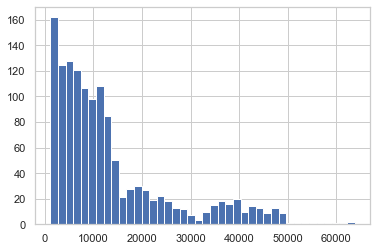

In [3]:
print(df.shape)
df.charges.hist(bins=40)

En el gráfico anterior se muestra que existen pocos valores después de los 50k

In [4]:
df[df.charges>50000]


,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


Solo 7 registros cumplen con la característica de tener un `charges` mayor a 50k. En casos didáctico los vamos a eleminar, en un caso práctico es necesario fundamentar la razón de eliminar los datos.

In [5]:
df = df[df.charges<50000]

### Análisis de correlación los datos

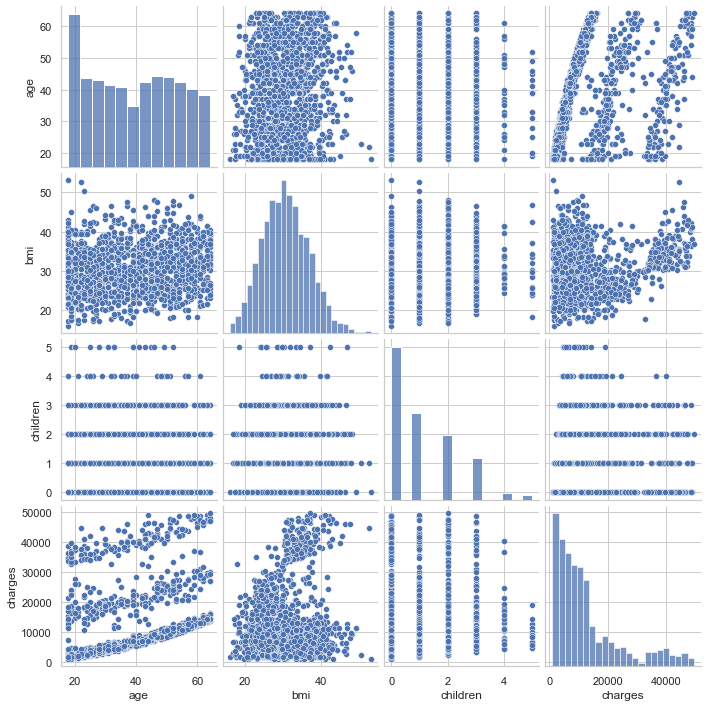

In [6]:

sns.pairplot(df, height=2.5)
plt.show()

<AxesSubplot:>

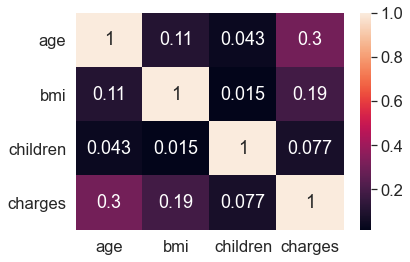

In [7]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_columns].values.T)
sns.set(font_scale= 1.5)
sns.heatmap(cm, annot=True, yticklabels=numeric_columns, xticklabels=numeric_columns)

### One Hot Encoding


In [6]:

df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Con `dropfirst` se eleminan variables redundantes generadas por el OHE de las variables dummies.

* Análisis de correlación entre todas las variables
* Análisis de corrrelación entre las variables categoricas

<AxesSubplot:>

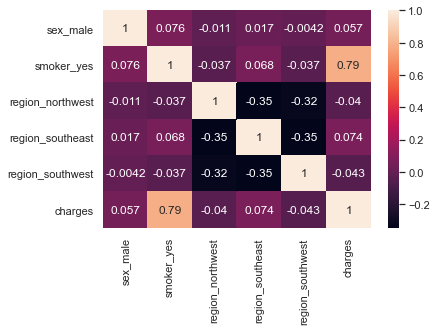

In [7]:
numeric_columns = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'charges']
cm = np.corrcoef(df[numeric_columns].values.T)
sns.set(font_scale= 1)
sns.heatmap(cm, annot=True, yticklabels=numeric_columns, xticklabels=numeric_columns)

<AxesSubplot:>

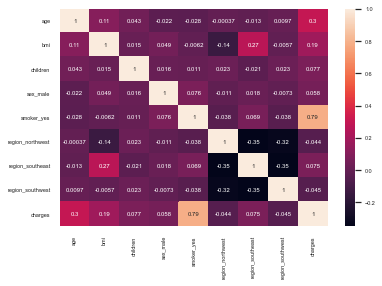

In [10]:
numeric_columns = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'charges']
cm = np.corrcoef(df[numeric_columns].values.T)
sns.set(font_scale= 0.5)
sns.heatmap(cm, annot=True, yticklabels=numeric_columns, xticklabels=numeric_columns)

## Entrenamiento del modelo

In [12]:
X_cols = list(set(df.columns)-set(['charges']))
y_cols = ['charges']

X = df[X_cols].values
y = df[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)



In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
y_pred.shape

(333, 1)

## Evaluación del modelo

In [15]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2", r2.round(4))
print("mse", mse.round(4))

r2 0.7635
mse 0.2613


Para el r2 es un modelo bueno arriba del 75, mejor 85 casi perfecto arraba del 95
El MSE es bajo, es bueno. 

In [4]:
!pip install regressors 

  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12374 sha256=59aa47da789df3f7c1735e884489e7054d0121f3f8a2895c8069704bc451a192
  Stored in directory: /Users/cmillan/Library/Caches/pip/wheels/46/c3/e9/d1797db3a01a1f101ad3cbcdf01b1be7273a25c78c77dd4bb9
Successfully built regressors


In [16]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)


In [18]:
y_test = y_test.reshape(-1)

print("====== Summary ======")
stats.summary(model, X_test, y_test, X_cols)

====== Summary ======
Residuals:
    Min     1Q  Median      3Q    Max
-1.9349 -0.144  0.0561  0.2028  0.924


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.015810    0.028152  -0.5616  0.574777
region_southeast -0.016564    0.032799  -0.5050  0.613874
region_northwest  0.012063    0.032335   0.3731  0.709335
children          0.042124    0.028719   1.4668  0.143383
age               0.310555    0.027286  11.3817  0.000000
smoker_yes        0.781894    0.027491  28.4423  0.000000
bmi               0.161362    0.031030   5.2002  0.000000
sex_male         -0.008170    0.028289  -0.2888  0.772918
region_southwest -0.007505    0.034253  -0.2191  0.826699
---
R-squared:  0.76349,    Adjusted R-squared:  0.75765
F-statistic: 130.74 on 8 features


<function matplotlib.pyplot.show(close=None, block=None)>

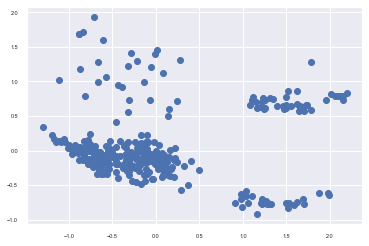

In [19]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

# Mejorando el modelo



In [21]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepesoperfumador'] = df_second.sobrepeso * df_second.smoker_yes

In [22]:
X_cols = list(set(df_second.columns)-set(['charges']))
y_cols = ['charges']

X = df_second[X_cols].values
y = df_second[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2", r2.round(4))
print("mse", mse.round(4))

r2 0.8896
mse 0.1109


In [25]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print("====== Summary ======")
stats.summary(model, X_test, y_test, X_cols)



====== Summary ======
Residuals:
    Min     1Q  Median      3Q     Max
-1.9607  0.062  0.1114  0.1432  0.3388


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept           0.003120    0.018417   0.1694  0.865598
region_southeast    -0.018015    0.021546  -0.8361  0.403695
region_northwest    -0.002709    0.022240  -0.1218  0.903134
sobrepeso           -0.034640    0.027797  -1.2462  0.213577
children             0.079863    0.017361   4.6001  0.000006
age                 -0.113461    0.096691  -1.1734  0.241461
smoker_yes           0.448137    0.026842  16.6952  0.000000
bmi                  0.057330    0.028469   2.0138  0.044839
sex_male            -0.019036    0.018382  -1.0356  0.301145
age2                 0.431486    0.097695   4.4167  0.000014
sobrepesoperfumador  0.496195    0.026277  18.8832  0.000000
region_southwest    -0.040816    0.020829  -1.9596  0.050883
---
R-squared:  0.88959,    Adjusted R-squared:  0.88580
F-statistic: 235.12 on 

In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

Elejir las características ideales, aquellas con un p-value < 0.05

In [27]:
X_cols = ['region_southwest', 'sobrepesoperfumador', 'smoker_yes', 'age2', 'children']
y_cols = ['charges']

X = df_second[X_cols].values
y = df_second[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2", r2.round(4))
print("mse", mse.round(4))

r2 0.8779
mse 0.1303


In [30]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print("====== Summary ======")
stats.summary(model, X_test, y_test, X_cols)

====== Summary ======
Residuals:
    Min      1Q  Median      3Q     Max
-1.8111  0.0777  0.1142  0.1332  0.3698


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept           0.002837    0.019979   0.1420  0.887164
region_southwest    -0.021573    0.021075  -1.0236  0.306766
sobrepesoperfumador  0.487764    0.023642  20.6316  0.000000
smoker_yes           0.468832    0.023763  19.7297  0.000000
age2                 0.329332    0.019205  17.1482  0.000000
children             0.062642    0.018795   3.3328  0.000957
---
R-squared:  0.87792,    Adjusted R-squared:  0.87605
F-statistic: 470.32 on 5 features


El resultado muestra ahora que no es necesario el _intercept` y `region_southwest`

In [31]:
X_cols = ['sobrepesoperfumador', 'smoker_yes', 'age2', 'children']
y_cols = ['charges']

X = df_second[X_cols].values
y = df_second[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [33]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2", r2.round(4))
print("mse", mse.round(4))

r2 0.8861
mse 0.117


In [36]:

model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print("====== Summary ======")
stats.summary(model, X_test, y_test, X_cols)

====== Summary ======
Residuals:
    Min      1Q  Median      3Q     Max
-1.8101  0.0752  0.1154  0.1362  0.4094


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept           0.000000    0.018810   0.0000  1.000000
sobrepesoperfumador  0.496227    0.023969  20.7027  0.000000
smoker_yes           0.454794    0.025162  18.0745  0.000000
age2                 0.316146    0.018726  16.8831  0.000000
children             0.064448    0.019041   3.3847  0.000798
---
R-squared:  0.88608,    Adjusted R-squared:  0.88469
F-statistic: 637.77 on 4 features


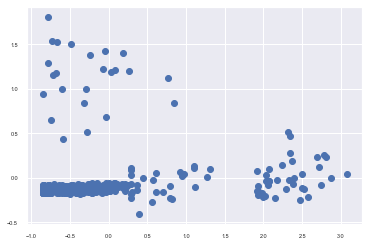

In [38]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()